##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/data.csv',index_col=0)
data.head()

,seller_id,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,max_payment,payment_ease,geolocation_zip_code_prefix,customer_state,geolocation_lat,geolocation_lng,geolocation_lat_seller,geolocation_lng_seller,distance
customer_id,,,,,,,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,0015a82c2db000af6aaaf3ae2ecb0532,1.0,1.0,appliance,8.0,Wednesday,4.0,21.0,9.0,1.0,credit_card,916.02,916.02,8.0,35490,MG,-20.671105,-44.065872,-23.640444,-46.541742,417.0
d9442164acf4b03109425633efaa0cfc,0015a82c2db000af6aaaf3ae2ecb0532,1.0,1.0,appliance,13.0,Thursday,3.0,24.0,12.0,5.0,credit_card,916.02,916.02,4.0,38600,MG,-17.224179,-46.874265,-23.640444,-46.541742,715.0
944b72539d7e1f7f7fc6e46639ef1fe3,0015a82c2db000af6aaaf3ae2ecb0532,1.0,1.0,appliance,22.0,Tuesday,5.0,33.0,10.0,5.0,credit_card,916.02,916.02,10.0,87502,PR,-23.759416,-53.292784,-23.640444,-46.541742,688.0
23bfd4316e261786deed5a08231c75bc,001cca7ae9ae17fb1caed9dfb1094831,1.0,1.0,tools,0.0,Thursday,2.0,21.0,8.0,5.0,credit_card,142.06,142.06,3.0,11431,SP,-23.995826,-46.278739,-20.278513,-40.411675,732.0
5fb9d23a8af73d1d81be9447185a10f7,001cca7ae9ae17fb1caed9dfb1094831,1.0,1.0,tools,18.0,Monday,2.0,20.0,7.0,4.0,credit_card,132.08,132.08,2.0,6702,SP,-23.581605,-46.929404,-20.278513,-40.411675,766.0


In [3]:
data.shape

(88361, 21)

In [4]:
data.select_dtypes(include=['object','category']).columns

Index(['seller_id', 'main_category', 'purchase_day', 'common_payment_method',
       'customer_state'],
      dtype='object')

In [5]:
data.select_dtypes(include=np.number).columns

Index(['items_number', 'sellers_number', 'purchase_hour', 'week_of_month',
       'estimated_delivery_days', 'delivery_days', 'review_score',
       'mean_payments', 'max_payment', 'payment_ease',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_lat_seller', 'geolocation_lng_seller', 'distance'],
      dtype='object')

We have several columns to drop : 

- seller variables like the identification and the geolocation features

- location variables like **zip_code_prefix** and the **state**

- **max payments** due to high correlation with the **mean_payments** 

In [3]:
columns_to_encode=['main_category', 'purchase_day','common_payment_method']
columns_to_drop=['seller_id','geolocation_lat_seller', 'geolocation_lng_seller','geolocation_zip_code_prefix','max_payment','customer_state']

In [4]:
X=data.drop(columns_to_drop,axis=1)

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

we have two types of transformations: 

- categorical features: **Onehotencoder** from scikit learn to assign binary value for each input

- numerical features: **StandardScaler** in order to have the same range for all the numeric variables  

In [6]:
ohe=OneHotEncoder(sparse=False)
sc=StandardScaler()

In [7]:
X[X.drop(columns_to_encode,axis=1).columns.values.tolist()]=sc.fit_transform(X.drop(columns_to_encode,axis=1))
ohe.fit(X[columns_to_encode].values)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [11]:
X

,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance
customer_id,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,-0.175115,-0.109292,appliance,-1.272681,Wednesday,0.674905,-0.273475,-0.343259,-2.488288,credit_card,5.794533,2.007748,0.128654,0.535573,-0.308104
d9442164acf4b03109425633efaa0cfc,-0.175115,-0.109292,appliance,-0.332777,Thursday,-0.090700,0.118126,0.046900,0.655496,credit_card,5.794533,0.444271,0.773433,-0.177617,0.234713
944b72539d7e1f7f7fc6e46639ef1fe3,-0.175115,-0.109292,appliance,1.359050,Tuesday,1.440510,1.292929,-0.213206,0.655496,credit_card,5.794533,2.789487,-0.449044,-1.807596,0.185532
23bfd4316e261786deed5a08231c75bc,-0.175115,-0.109292,tools,-2.776528,Thursday,-0.856305,-0.273475,-0.473313,0.655496,credit_card,0.001155,0.053401,-0.493267,-0.026384,0.265679
5fb9d23a8af73d1d81be9447185a10f7,-0.175115,-0.109292,tools,0.607127,Monday,-0.856305,-0.404009,-0.603366,-0.130450,credit_card,-0.073549,-0.337468,-0.415783,-0.191620,0.327611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f978a12f447c1d1e426f473f95983c8,-0.175115,-0.109292,appliance,-0.896720,Wednesday,0.674905,-0.142941,-0.863472,-0.130450,credit_card,-0.329399,-0.728338,-0.401127,-0.138531,-0.907389
0ad73a033a18bf40507b6a86e483b303,-0.175115,-0.109292,appliance,-0.520758,Monday,-0.856305,-0.273475,-0.993526,-0.130450,credit_card,-0.329399,0.053401,-0.419393,-0.090001,-0.880066
c8ca4bcdd8d22697394008267108810d,-0.175115,-0.109292,appliance,0.607127,Thursday,-0.090700,-0.273475,-0.603366,0.655496,credit_card,-0.329399,0.053401,-0.146691,-1.341856,-0.195169


In [9]:
left_data=X.drop(columns_to_encode,axis=1)
right_data=pd.DataFrame(ohe.transform(X[columns_to_encode]),columns=ohe.get_feature_names().tolist())

In [10]:
X_binary=pd.merge(left_data,right_data.set_index(left_data.index),left_index=True,right_index=True)
X_binary

,items_number,sellers_number,purchase_hour,week_of_month,estimated_delivery_days,delivery_days,review_score,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance,x0_appliance,x0_beauty,x0_children,x0_electronics,x0_food,x0_home_furniture,x0_leisure,x0_office,x0_other,x0_tools,x1_Friday,x1_Monday,x1_Saturday,x1_Sunday,x1_Thursday,x1_Tuesday,x1_Wednesday,x2_boleto,x2_credit_card,x2_debit_card,x2_voucher
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,-0.175115,-0.109292,-1.272681,0.674905,-0.273475,-0.343259,-2.488288,5.794533,2.007748,0.128654,0.535573,-0.308104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
d9442164acf4b03109425633efaa0cfc,-0.175115,-0.109292,-0.332777,-0.090700,0.118126,0.046900,0.655496,5.794533,0.444271,0.773433,-0.177617,0.234713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
944b72539d7e1f7f7fc6e46639ef1fe3,-0.175115,-0.109292,1.359050,1.440510,1.292929,-0.213206,0.655496,5.794533,2.789487,-0.449044,-1.807596,0.185532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
23bfd4316e261786deed5a08231c75bc,-0.175115,-0.109292,-2.776528,-0.856305,-0.273475,-0.473313,0.655496,0.001155,0.053401,-0.493267,-0.026384,0.265679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5fb9d23a8af73d1d81be9447185a10f7,-0.175115,-0.109292,0.607127,-0.856305,-0.404009,-0.603366,-0.130450,-0.073549,-0.337468,-0.415783,-0.191620,0.327611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f978a12f447c1d1e426f473f95983c8,-0.175115,-0.109292,-0.896720,0.674905,-0.142941,-0.863472,-0.130450,-0.329399,-0.728338,-0.401127,-0.138531,-0.907389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
0ad73a033a18bf40507b6a86e483b303,-0.175115,-0.109292,-0.520758,-0.856305,-0.273475,-0.993526,-0.130450,-0.329399,0.053401,-0.419393,-0.090001,-0.880066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
c8ca4bcdd8d22697394008267108810d,-0.175115,-0.109292,0.607127,-0.090700,-0.273475,-0.603366,0.655496,-0.329399,0.053401,-0.146691,-1.341856,-0.195169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
X_mix=X.copy().iloc[0:10000]

We have prepared two types of data since we will use different clustering algorithms:

- **X_mix**: this data combines scaled numerical variables with categorical features (not encoded) to use for the Kprototype algorithm

- **X_binary**: while this data have the scaled numerical variables along with the encoded categorical features (binary) to use for other clustering algorithms such as **Kmeans**, **Heirchical cluustering** etc

# **Dimentionality Reduction**

## **PCA**

First, we will try to reduce the number of our variable regarding the cumuulative variance method.

To perform this step we need the Principal component Analysis (**PCA**) decomposition

In [15]:
from sklearn.decomposition import *

In [16]:
pca=PCA()
pca.fit(X_binary)
pca.explained_variance_ratio_

array([1.82419457e-01, 1.21784031e-01, 9.33883744e-02, 8.56121223e-02,
       7.29129761e-02, 7.05720576e-02, 6.85843269e-02, 4.81173369e-02,
       3.91315029e-02, 3.38926807e-02, 2.66166815e-02, 1.75444251e-02,
       1.59814508e-02, 1.34677503e-02, 1.14643526e-02, 1.12066274e-02,
       1.11826349e-02, 1.05535803e-02, 1.00642768e-02, 9.93142631e-03,
       8.62016960e-03, 7.88556985e-03, 7.27436226e-03, 5.75162675e-03,
       4.98442822e-03, 4.13328007e-03, 2.98662338e-03, 2.10571316e-03,
       1.10631597e-03, 7.23838332e-04, 3.59758946e-32, 1.27741125e-33,
       1.27741125e-33])

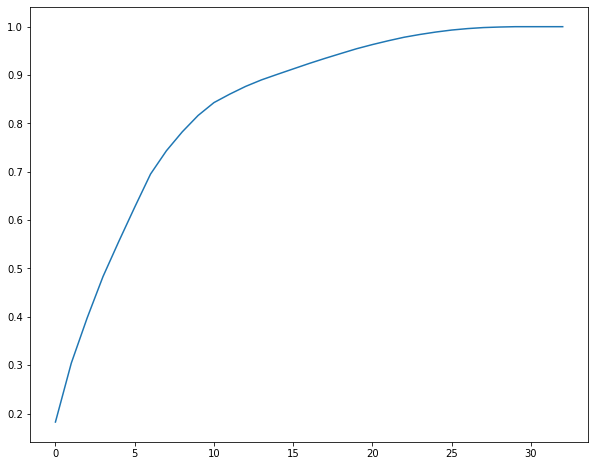

In [17]:
plt.figure(figsize=(10,8))
variance_ratio=pca.explained_variance_ratio_
plt.plot(list(range(len(variance_ratio))),variance_ratio.cumsum().tolist())

In [18]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

20

we can achieve 90% of the variance with only 20 features 

Next step is to project the data on the 20 first component 

In [19]:
pca=PCA(n_components=20)
X_reduced=pca.fit_transform(X_binary.iloc[:10000])

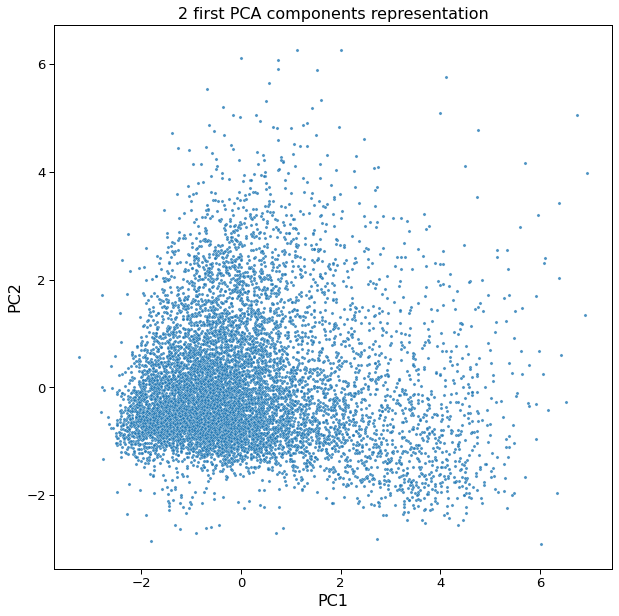

In [20]:

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
plt.title('2 first PCA components representation',fontdict={'fontsize':16})
plt.xlabel('PC1',fontdict={'fontsize':16})
plt.ylabel('PC2',fontdict={'fontsize':16})
ax = plt.gca()

sns.scatterplot(x = X_reduced[:,1],
                y = X_reduced[:,2],
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)

In [ ]:
pcs=pca.components_

In [ ]:
pcs

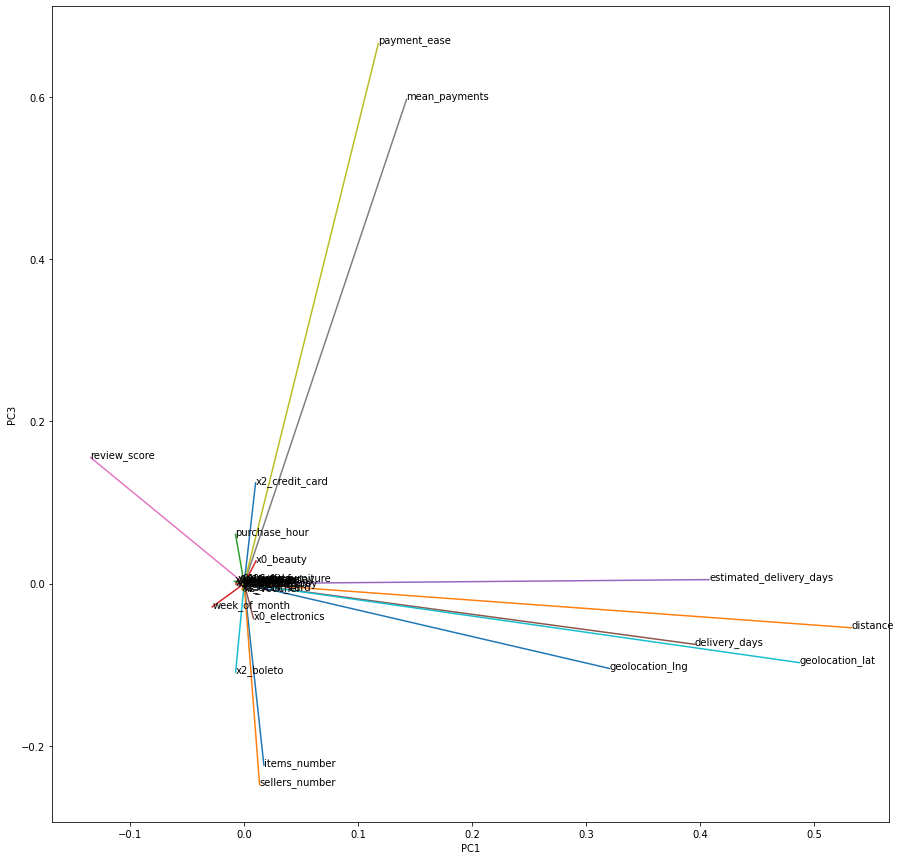

In [ ]:
pcs=pca.components_
plt.figure(figsize=(15,15))
for i,(x,y) in enumerate(zip(pcs[0,:],pcs[2,:])):

  plt.plot([0,x],[0,y])
  plt.text(x,y,X.columns[i])

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

### **Observations**

- review_score has negative effect on the first component 

- payment_ease and mean_payment have the same influence on the third component 

- items_number and sellers_number are highly correlated with the third component

## **t-SNE**

In order to get a better visualisation of our projected data, t-SNE could give us a better plot which shows the different clusters

In [21]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_reduced)

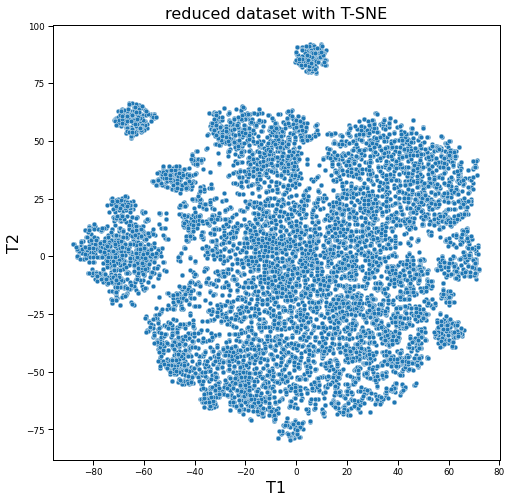

In [30]:
plt.figure(figsize=(8,8))
plt.title('reduced dataset with T-SNE',fontdict={'fontsize':16})
plt.xlabel('T1',fontdict={'fontsize':16})
plt.ylabel('T2',fontdict={'fontsize':16})
sns.scatterplot(T[:,0], T[:,1])
plt.show()


As it was expected:

- with **t-SNE** we have a better distribution 

- we can see some clusters 

# **Clustering**

Moving on to **clustering process** 

We are beginning with the famous KMeans method which is:

- Easy to implement
- Guarantee convergence 
- No big computational cost

## **Kmeans**

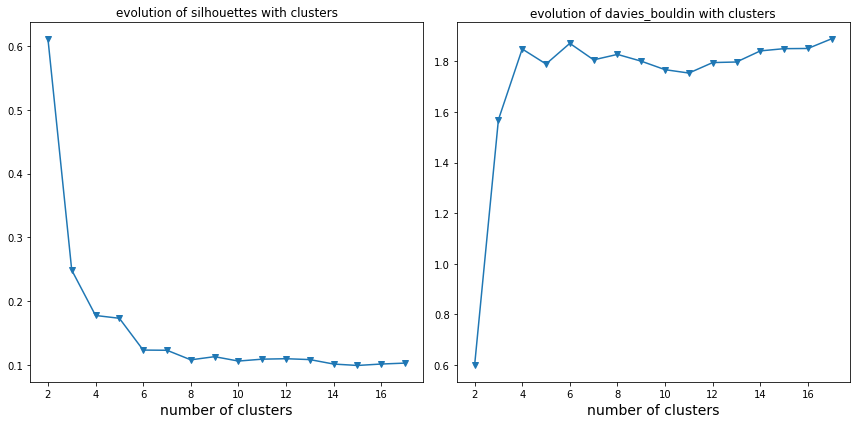

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouettes=[]
davies_bouldin_kmeans = []
for n_cluster in range(2,18):
  kmean=KMeans(n_clusters=n_cluster,verbose=1,n_jobs=-1)
  kmean.fit(X_reduced)
  silhouettes.append(silhouette_score(X_reduced,kmean.labels_))
  davies_bouldin_kmeans.append(davies_bouldin_score(X_reduced,labels= kmean.labels_))

list_metrics={'silhouettes':silhouettes,'davies_bouldin':davies_bouldin_kmeans}
fig=plt.figure(figsize=(12,6))
for i,(metric,values) in enumerate(list_metrics.items()):  
  fig.add_subplot(1,2,i+1)
  plt.plot(range(2,18),values,marker='v')
  plt.xlabel('number of clusters',fontsize=14)
 #plt.ylabel('Density',fontsize=14)
  plt.title(f"evolution of {metric} with clusters")
  plt.tight_layout()

**Observation**: 

- We are looking for clusters which maximises the **silhouette_score** and minimize the **davies_bouldin_score**

- According to the two plots above we can see that we only need **two Clusters**!!! which seems not possible for this type of segmentation 




We are going to try with another clustering Algorithm which is **KPrototype** from **Kmodes**

This algorithm offers the possibility to work with mixing data (categorical and numerical)



## **Kmodes-KPrototype**

**Kprototype** from **Kmodes** is known for it ability to deal with mixing data type 

In [ ]:
pip install kmodes

###Kprototype

We are going to use the **X_mix** data which combines scaled nuumerical data and not encoded categorical features

In [ ]:
X_mix

,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance
customer_id,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,-0.175115,-0.109292,appliance,-1.272681,Wednesday,0.674905,-0.273475,-0.343259,-2.488288,credit_card,5.794533,2.007748,0.128654,0.535573,-0.308104
d9442164acf4b03109425633efaa0cfc,-0.175115,-0.109292,appliance,-0.332777,Thursday,-0.090700,0.118126,0.046900,0.655496,credit_card,5.794533,0.444271,0.773433,-0.177617,0.234713
944b72539d7e1f7f7fc6e46639ef1fe3,-0.175115,-0.109292,appliance,1.359050,Tuesday,1.440510,1.292929,-0.213206,0.655496,credit_card,5.794533,2.789487,-0.449044,-1.807596,0.185532
23bfd4316e261786deed5a08231c75bc,-0.175115,-0.109292,tools,-2.776528,Thursday,-0.856305,-0.273475,-0.473313,0.655496,credit_card,0.001155,0.053401,-0.493267,-0.026384,0.265679
5fb9d23a8af73d1d81be9447185a10f7,-0.175115,-0.109292,tools,0.607127,Monday,-0.856305,-0.404009,-0.603366,-0.130450,credit_card,-0.073549,-0.337468,-0.415783,-0.191620,0.327611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd8cd2759780f318fc3f5b9856cad495,-0.175115,-0.109292,children,-0.708739,Tuesday,-0.090700,-0.273475,-0.603366,-0.130450,boleto,-0.493179,-0.728338,-0.411690,-0.166767,-0.322677
1323b64fe97b459e7533dcfe0f624a5a,-0.175115,-0.109292,children,-1.272681,Tuesday,-0.090700,0.640261,0.176953,0.655496,credit_card,-0.432323,-0.728338,-1.005358,-1.864670,0.180067
41d408dd2218c87553f684effcfd3af0,-0.175115,-0.109292,children,-0.520758,Monday,-0.856305,-0.012408,-0.343259,0.655496,boleto,-0.493179,-0.728338,-0.399490,-0.083422,-0.278960


In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
cost=[]
n_clusters = []
clusters_assigned = []
for num_cluster in range(3,18):
    kproto = KPrototypes(n_clusters=num_cluster, init='Cao',verbose=1)
    clusters=kproto.fit_predict(X_mix, categorical=[2,4,9])
    cost.append(kproto.cost_)
    n_clusters.append(num_cluster)
    clusters_assigned.append(clusters)

In [23]:
cost=[98863.50093974861, 90405.88056606962, 83174.48431901932, 77391.02301054132, 75608.98828188828,69386.3607223333, 66063.95592867005,
 63715.817578617345, 61735.29541708848, 59964.415585260766,58675.726832949185, 57429.747243314865, 56424.47650489235, 55580.32124865112, 54972.47746115702]

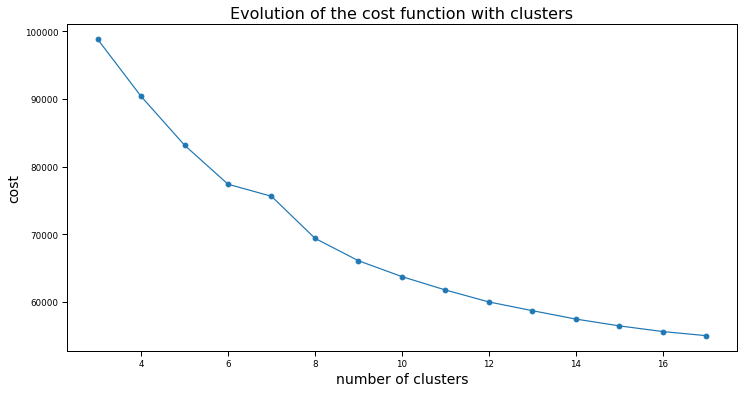

In [24]:
plt.figure(figsize=(12,6))
plt.plot(range(3,18),cost,marker='o')
plt.xlabel('number of clusters',fontsize=14)
plt.ylabel('cost',fontsize=14)
plt.title('Evolution of the cost function with clusters',fontsize=16)
plt.show()

According to the Elbow method, 8 Clusters seems to be the best choice for our segmentation

In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
best_kproto = KPrototypes(n_clusters=8, init='Cao',verbose=1)
cluster=best_kproto.fit_predict(X_mix, categorical=[2,4,9])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3737, ncost: 75965.63413917639
Run: 1, iteration: 2/100, moves: 1686, ncost: 72787.66029464811
Run: 1, iteration: 3/100, moves: 771, ncost: 72380.02440173135
Run: 1, iteration: 4/100, moves: 532, ncost: 72094.64994677939
Run: 1, iteration: 5/100, moves: 559, ncost: 71710.45283481173
Run: 1, iteration: 6/100, moves: 552, ncost: 71388.59556294829
Run: 1, iteration: 7/100, moves: 418, ncost: 71193.27754270133
Run: 1, iteration: 8/100, moves: 300, ncost: 71058.01886298932
Run: 1, iteration: 9/100, moves: 326, ncost: 70834.88248852472
Run: 1, iteration: 10/100, moves: 329, ncost: 70630.52418392284
Run: 1, iteration: 11/100, moves: 282, ncost: 70504.63593253867
Run: 1, iteration: 12/100, moves: 213, ncost: 70471.30487427246
Run: 1, iteration: 13/100, moves: 158, ncost: 70453.01198242599
Run: 1, iteration: 14/100, moves: 127, ncost: 70438.20552086261
Run: 1, iteration: 15/100, move

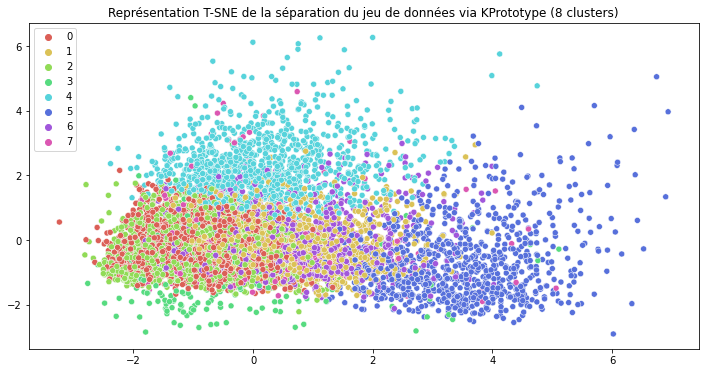

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Représentation T-SNE de la séparation du jeu de données via KPrototype (8 clusters)')
sns.scatterplot(X_reduced[:,1], 
                X_reduced[:,2],
               hue=best_kproto.labels_,
                legend='full',
               palette=sns.color_palette("hls",8))

with the **PCA** representation we can see some overlapping data

Cluusters are not clearly shown here

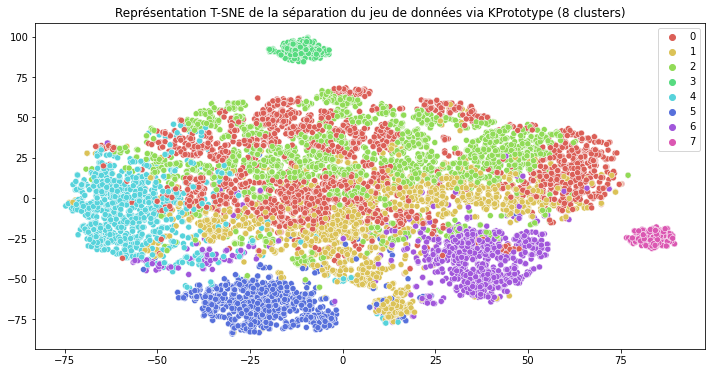

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Représentation T-SNE de la séparation du jeu de données via KPrototype (8 clusters)')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=best_kproto.labels_,
                legend='full',
               palette=sns.color_palette("hls",8))

### Hierarchical clustering 

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
cah = AgglomerativeClustering(n_clusters = 8).fit(X_reduced)

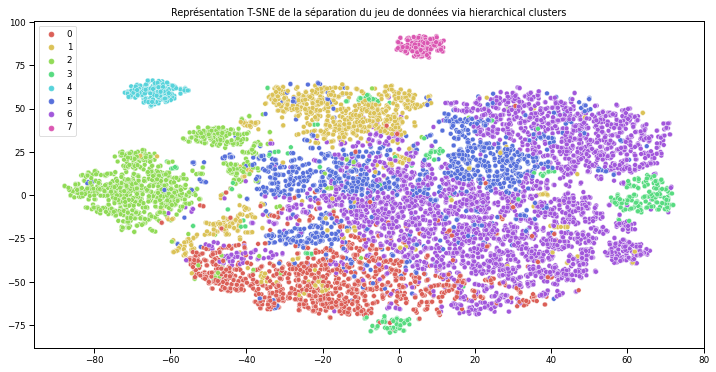

In [35]:
plt.figure(figsize=(12,6))
plt.title('Représentation T-SNE de la séparation du jeu de données via hierarchical clusters')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=cah.labels_,
                legend='full',
               palette=sns.color_palette("hls",8))

with the **t-SNE** graph we have a better visualization of our clusters 

### **tuning hyperparameter**

####method of initialization and number of iterations 

In [ ]:
methods=['Huang', 'Cao', 'random']
n_iterations=[10,20,30]
cost_dict={}
for method in methods:
  cost=[]
  for n in n_iterations:
    test_kproto=KPrototypes(n_clusters=8,n_init=n,init=method,verbose=1)
    test_clusters=test_kproto.fit_predict(X_mix, categorical=[2,4,9])
    cost.append(test_kproto.cost_)

  cost_dict[method]=cost

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Run: 9, iteration: 12/100, moves: 0, ncost: 73962.86248885827
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 3363, ncost: 84022.79099291688
Run: 10, iteration: 2/100, moves: 2176, ncost: 80242.2227492287
Run: 10, iteration: 3/100, moves: 1470, ncost: 77840.77526684826
Run: 10, iteration: 4/100, moves: 1035, ncost: 76820.47431219394
Run: 10, iteration: 5/100, moves: 603, ncost: 76543.81491477368
Run: 10, iteration: 6/100, moves: 533, ncost: 73583.68981778518
Run: 10, iteration: 7/100, moves: 303, ncost: 73411.02062688513
Run: 10, iteration: 8/100, moves: 164, ncost: 73392.96832257956
Run: 10, iteration: 9/100, moves: 113, ncost: 73383.35132162365
Run: 10, iteration: 10/100, moves: 58, ncost: 73381.01595990061
Run: 10, iteration: 11/100, moves: 33, ncost: 73380.12781790404
Run: 10, iteration: 12/100, moves: 37, ncost: 73378.83570932024
Run: 10, 

In [ ]:
cost_dict['Cao']

[70072.39754238204, 70064.58218201352, 70073.44160036134]

In [ ]:
cost_dict['Huang']

[70734.28694663524, 70062.68545015718, 70062.7044204289]

In [ ]:
cost_dict['random']

[70067.74437269606, 70072.87975184896, 70068.4095606842]

In [25]:
cost_dict={'Cao':[70072.39754238204, 70064.58218201352, 70073.44160036134],
           'Huang':[70734.28694663524, 70062.68545015718, 70062.7044204289],
           'random':[70067.74437269606, 70072.87975184896, 70068.4095606842]}

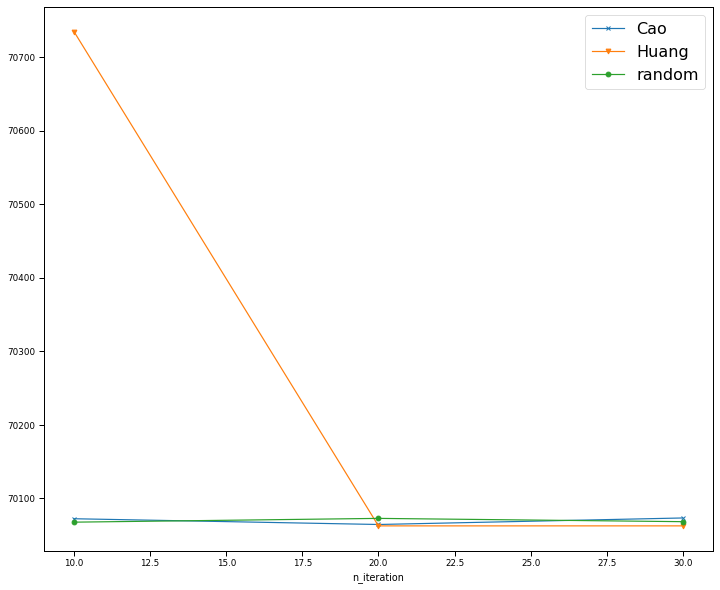

In [27]:
markers=['x','v','o']
plt.figure(figsize=(12,10))
for (key,value),mark in zip(cost_dict.items(),markers):
  plt.plot([10,20,30],value,marker=mark,label=key)
  plt.legend(fontsize=16)

plt.xlabel('n_iteration')
plt.show()

three methods were compared, **Huang** **Cao** and **random** with different iterations number 

As we can see our best parameters are the combination between the **Huang** method with 20 iterations. Which give us the least cost value 

- 

# **Full Dataset**

## **UMAP Embedding**

Another visualisation technique, similar to the t-SNE. the UMAP is known for its capability of dealing with non linear data

Distance is measured on both, numerical and categorical features  

In [15]:
pip install umap

  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=cc493f1b9b810097ab2df4b4a20661110c8c120826270493f769360f9385ffc7
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [23]:
data.drop(['seller_id','geolocation_lat_seller', 'geolocation_lng_seller','geolocation_zip_code_prefix','max_payment','customer_state'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import PowerTransformer
import umap
numerical = data.select_dtypes(include=np.number)

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = data.select_dtypes(exclude=np.number)
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(data.select_dtypes(exclude=np.number).columns) / data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                metric_kwds=fit1._metric_kwds,densmap_kwds=fit1._metric_kwds,output_dens=False, densmap=False,verbose=1)



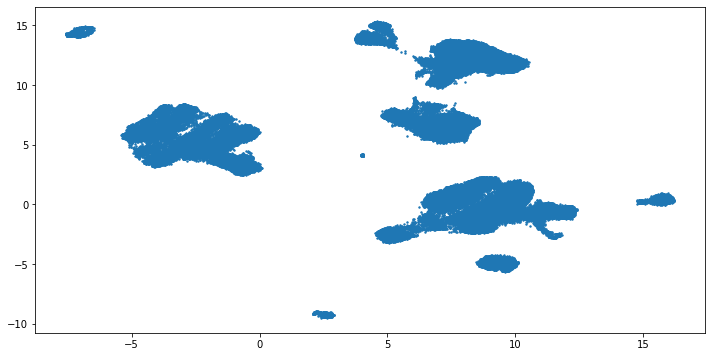

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(embedding[0][:,0],embedding[0][:,1], s=2, cmap='Spectral', alpha=1.0)
plt.show()

With this new embedding technic, we have a clear distribution of the clusters 

In [ ]:
from kmodes.kprototypes import KPrototypes
kprot_data = data.copy()
#Pre-processing
for c in data.select_dtypes(include=np.number).columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

#Actual clustering with best hyperparameters
kproto = KPrototypes(n_clusters= 8, init='Huang',verbose=1,n_init=20)
clusters = kproto.fit_predict(kprot_data, categorical=[2,4,9])

No handles with labels found to put in legend.


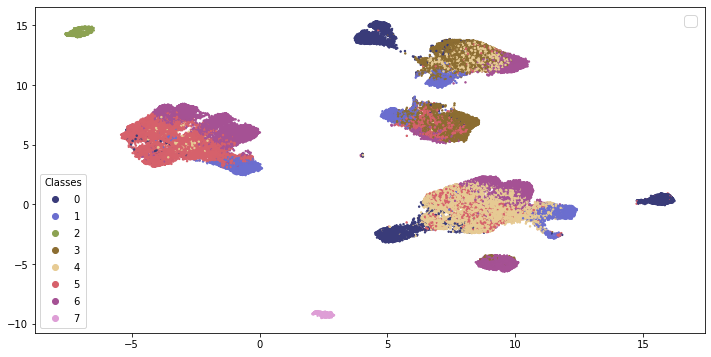

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,6))
scatter = ax.scatter(embedding[0][:, 0], embedding[0][:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0,)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=8),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.legend(fontsize=16)

Adding Lables to the main data

In [ ]:
columns_to_encode=['main_category', 'purchase_day','common_payment_method']
data=data.drop(columns_to_drop,axis=1)
data['label']=clusters

In [ ]:
data

,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance,label
customer_id,,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,1.0,1.0,appliance,8.0,Wednesday,4.0,21.0,9.0,1.0,credit_card,916.02,8.0,-20.671105,-44.065872,417.0,3
d9442164acf4b03109425633efaa0cfc,1.0,1.0,appliance,13.0,Thursday,3.0,24.0,12.0,5.0,credit_card,916.02,4.0,-17.224179,-46.874265,715.0,4
944b72539d7e1f7f7fc6e46639ef1fe3,1.0,1.0,appliance,22.0,Tuesday,5.0,33.0,10.0,5.0,credit_card,916.02,10.0,-23.759416,-53.292784,688.0,4
23bfd4316e261786deed5a08231c75bc,1.0,1.0,tools,0.0,Thursday,2.0,21.0,8.0,5.0,credit_card,142.06,3.0,-23.995826,-46.278739,732.0,4
5fb9d23a8af73d1d81be9447185a10f7,1.0,1.0,tools,18.0,Monday,2.0,20.0,7.0,4.0,credit_card,132.08,2.0,-23.581605,-46.929404,766.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f978a12f447c1d1e426f473f95983c8,1.0,1.0,appliance,10.0,Wednesday,4.0,22.0,5.0,4.0,credit_card,97.90,1.0,-23.503257,-46.720354,88.0,2
0ad73a033a18bf40507b6a86e483b303,1.0,1.0,appliance,12.0,Monday,2.0,21.0,4.0,4.0,credit_card,97.90,3.0,-23.600908,-46.529253,103.0,1
c8ca4bcdd8d22697394008267108810d,1.0,1.0,appliance,18.0,Thursday,3.0,21.0,7.0,5.0,credit_card,97.90,3.0,-22.143068,-51.458799,479.0,4


In [ ]:
from google.colab import files
data.to_csv('data_clustered.csv') 
files.download('data_clustered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Cluster Analysis**

### Load file

In [ ]:
data_clustered=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/data_clustered.csv',index_col=0)
data_clustered.head()

,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance,label
customer_id,,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,1.0,1.0,appliance,8.0,Wednesday,4.0,21.0,9.0,1.0,credit_card,916.02,8.0,-20.671105,-44.065872,417.0,3
d9442164acf4b03109425633efaa0cfc,1.0,1.0,appliance,13.0,Thursday,3.0,24.0,12.0,5.0,credit_card,916.02,4.0,-17.224179,-46.874265,715.0,4
944b72539d7e1f7f7fc6e46639ef1fe3,1.0,1.0,appliance,22.0,Tuesday,5.0,33.0,10.0,5.0,credit_card,916.02,10.0,-23.759416,-53.292784,688.0,4
23bfd4316e261786deed5a08231c75bc,1.0,1.0,tools,0.0,Thursday,2.0,21.0,8.0,5.0,credit_card,142.06,3.0,-23.995826,-46.278739,732.0,4
5fb9d23a8af73d1d81be9447185a10f7,1.0,1.0,tools,18.0,Monday,2.0,20.0,7.0,4.0,credit_card,132.08,2.0,-23.581605,-46.929404,766.0,4


In [ ]:
data_clustered.groupby('label').mean().sort_values('payment_ease',ascending=False)

,items_number,sellers_number,purchase_hour,week_of_month,estimated_delivery_days,delivery_days,review_score,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance
label,,,,,,,,,,,,
4,1.017341,1.0,15.723827,3.023361,25.699248,11.407524,4.787173,216.916999,5.294231,-21.433000,-45.901487,576.218488
1,1.037845,1.0,14.087705,3.240288,15.963857,5.578294,4.464357,192.313312,4.624249,-23.161481,-46.836159,177.006708
7,2.000000,2.0,14.589645,3.130393,24.587728,8.558006,2.840844,217.395121,4.126558,-21.854299,-46.454214,549.443912
0,1.016911,1.0,14.653983,3.091567,30.352247,18.703605,4.029484,168.662188,3.248331,-9.008063,-39.711805,1776.744660
6,1.012356,1.0,15.104429,3.097649,27.926845,14.858283,4.303554,136.998456,2.675888,-27.106630,-52.089834,835.970694
3,1.031035,1.0,14.689506,3.052646,24.151988,16.955785,2.321831,142.252262,2.575923,-21.936787,-45.912066,493.934670
2,1.008046,1.0,15.100618,3.171326,14.013085,4.917019,4.412711,66.840237,1.295026,-23.282649,-46.713166,98.005933
5,1.008712,1.0,14.173386,3.161434,24.196866,10.669323,4.840212,93.784284,1.204993,-21.734123,-46.068632,510.978061


### clients per cluster

In [ ]:
data_clustered.label.value_counts()

5    18825
3    14113
4    13955
2    12304
1     9988
6     9145
0     8988
7     1043
Name: label, dtype: int64

### Numerical features distribtion by cluster

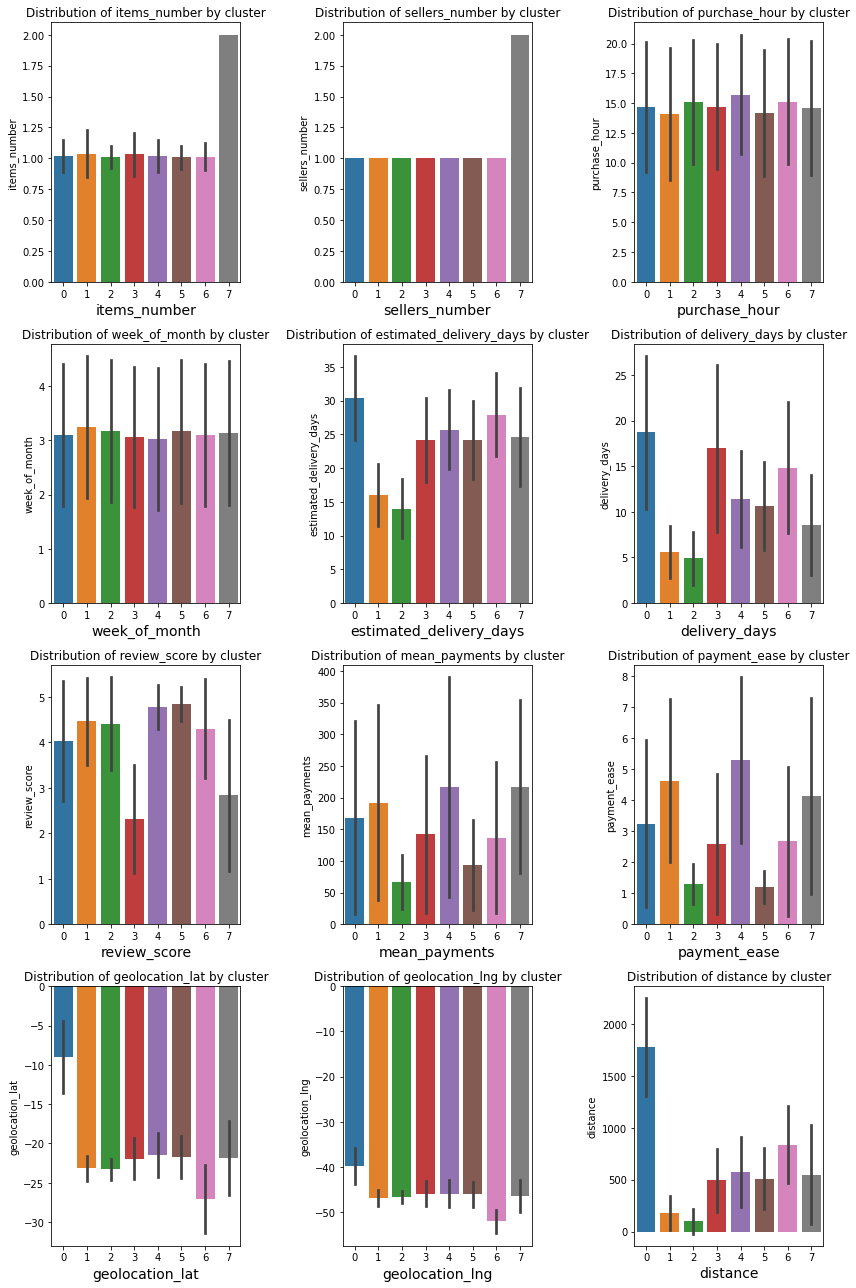

In [ ]:
import seaborn as sns
numerical_col=data_clustered.groupby('label').mean().columns
fig=plt.figure(figsize=(12,18))
for i, col in enumerate(numerical_col):
  fig.add_subplot(4,3,i+1)
  sns.barplot(x='label',y=col,data=data_clustered,ci='sd')
  plt.xlabel(col,fontsize=14)
 #plt.ylabel('Density',fontsize=14)
  plt.title(f"Distribution of {col} by cluster")
  plt.tight_layout()

Observations: 

- cluster 0 contains customers which combines long distances with sellers, high estimated delivery days and a mean review of 4

- cluster 1 customers belongs to the top3 in mean payments and payment ease combined with nearby sellers and relativeliy low estimated delivery days

- cluster 2 spend the least on the site and chooses the closest sellers with the max of 200 km 

- cluster 3 is filled with the average customers on several features

- cluster 4 are the customers that spend the most along with cluster 7 with high payment ease. we can see a great satisfation in this group

- cluster 5 close to cluster 3 with less payments and higher reviews

- cluster 6 average cluster

- cluster 7 customers tends to have more than one item with the highest spending amounts and lesser payment ease than cluster 4

### Categorical features distribution by cluster

**purchase category**

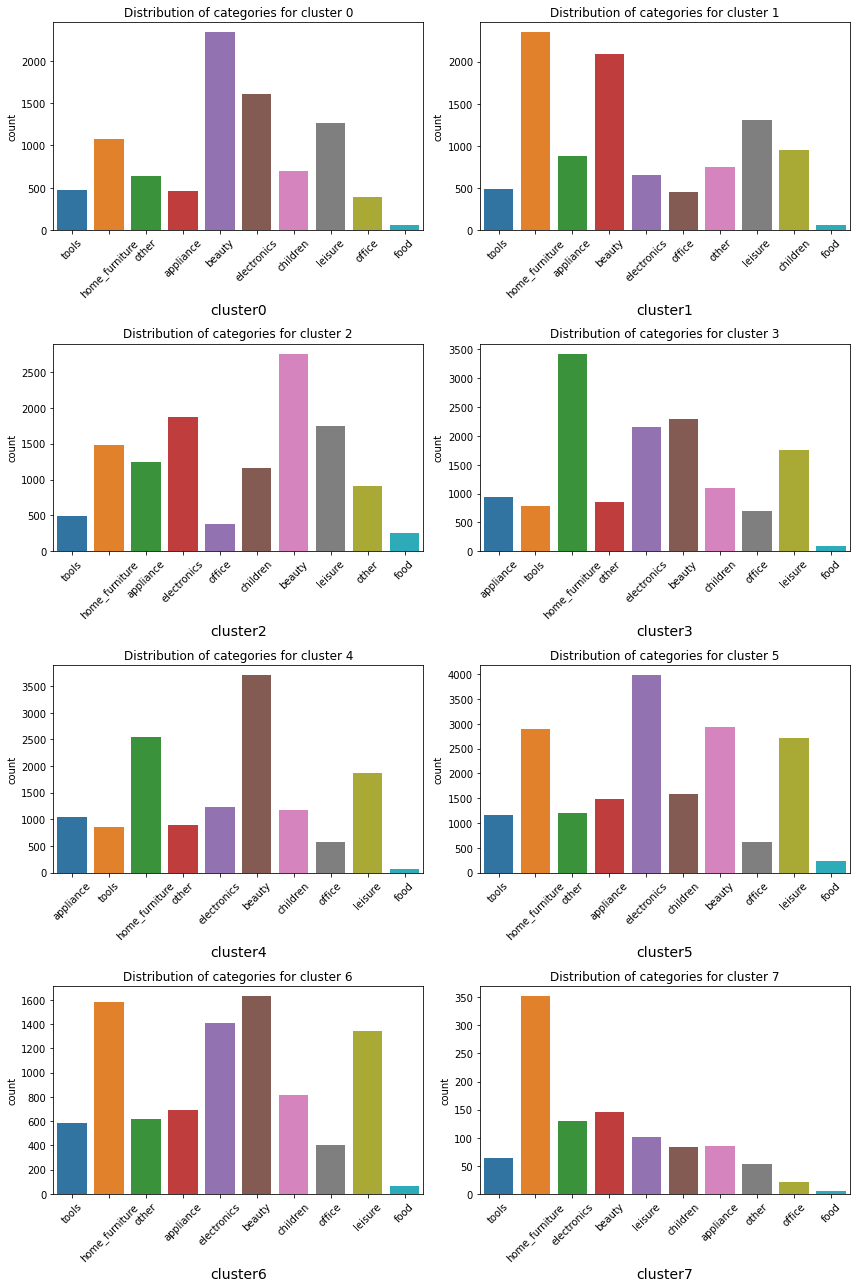

In [ ]:
fig=plt.figure(figsize=(12,18))
for i in range(0,8):  
  fig.add_subplot(4,2,i+1)
  dt=data_clustered[data_clustered['label']==i]
  sns.countplot(dt['main_category'],orient=45)
  plt.xlabel(f'cluster{i}',fontsize=14)
  plt.xticks(rotation=45)
 #plt.ylabel('Density',fontsize=14)
  plt.title(f"Distribution of categories for cluster {i}")
  plt.tight_layout()


Observations: 

- cluster 0 combines **beauty** and **electronics** categories 

- cluster 1 combines **home_furnitures** and **beauty**

- cluster 2 same as cluster 0

- cluster 3 combines **home_furnitures** **electronics** and **beauty**

- cluster 4 same as cluster 1 with more interest to the **beauty** category

- cluster 5 **electronics** and **home_furnitures**

- cluster 6 a combination between **beauty** **home_furnitures** **electronics** and **leisure**

- cluster 7 essentially **home_furniture**

**purchase day**

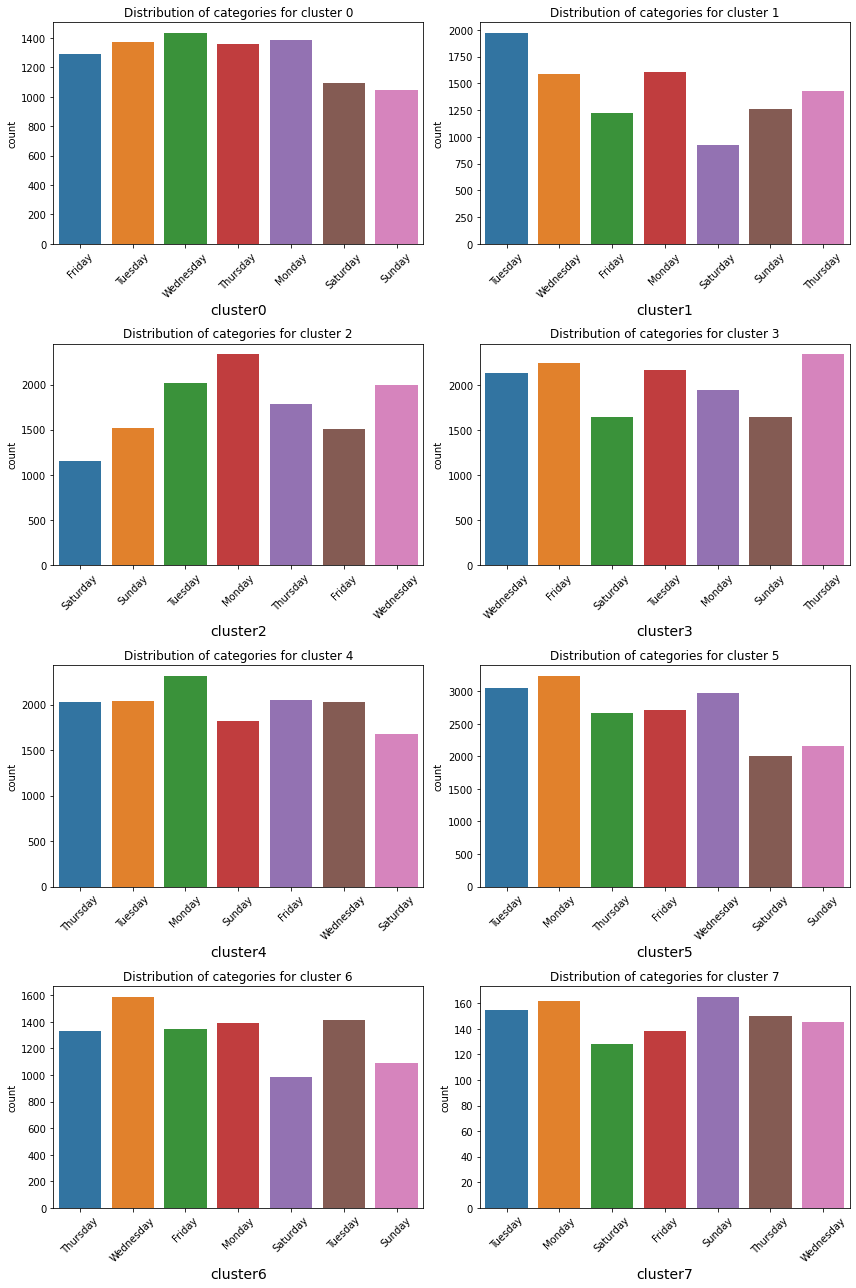

In [ ]:
fig=plt.figure(figsize=(12,18))
for i in range(0,8):  
  fig.add_subplot(4,2,i+1)
  dt=data_clustered[data_clustered['label']==i]
  sns.countplot(dt['purchase_day'])
  plt.xlabel(f'cluster{i}',fontsize=14)
  plt.xticks(rotation=45)
  plt.title(f"Distribution of categories for cluster {i}")
  plt.tight_layout()


**payment method**

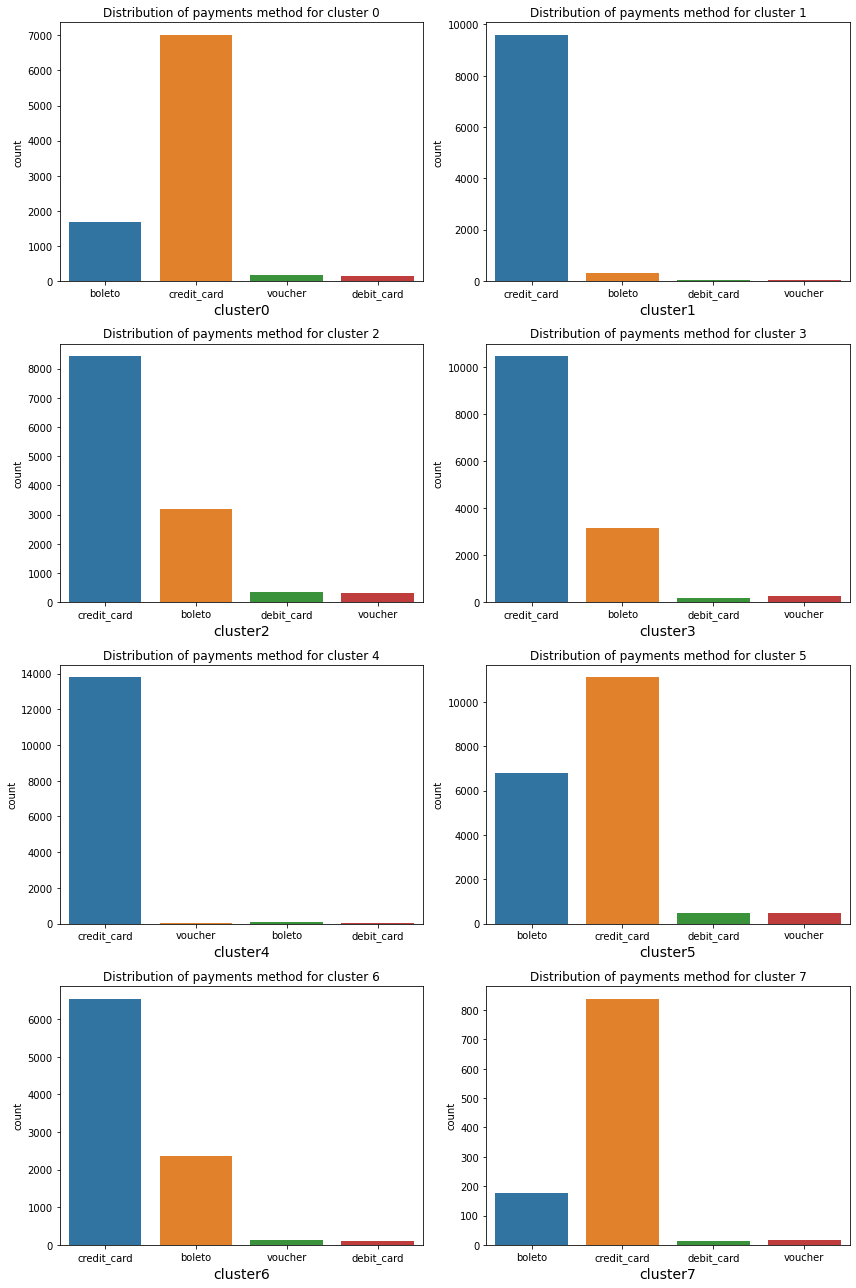

In [ ]:
fig=plt.figure(figsize=(12,18))
for i in range(0,8):  
  fig.add_subplot(4,2,i+1)
  dt=data_clustered[data_clustered['label']==i]
  sns.countplot(dt['common_payment_method'],orient=45)
  plt.xlabel(f'cluster{i}',fontsize=14)
 #plt.ylabel('Density',fontsize=14)
  plt.title(f"Distribution of payments method for cluster {i}")
  plt.tight_layout()

## Contrat de maintenance

In [ ]:
data_orders=pd.read_csv('/content/drive/MyDrive/Formation_Machine_Learning/POLIST/data/olist_orders_dataset.csv',index_col=0)

In [ ]:
data_clustered=data_clustered.join(data_orders.set_index('customer_id')).drop(['order_status','order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date'],axis=1)
data_clustered

,items_number,sellers_number,main_category,purchase_hour,purchase_day,week_of_month,estimated_delivery_days,delivery_days,review_score,common_payment_method,mean_payments,payment_ease,geolocation_lat,geolocation_lng,distance,label,order_purchase_timestamp
customer_id,,,,,,,,,,,,,,,,,
d7fc82cbeafea77bd0a8fbbf6296e387,1.0,1.0,appliance,8.0,Wednesday,4.0,21.0,9.0,1.0,credit_card,916.02,8.0,-20.671105,-44.065872,417.0,3,2017-10-18 08:16:34
d9442164acf4b03109425633efaa0cfc,1.0,1.0,appliance,13.0,Thursday,3.0,24.0,12.0,5.0,credit_card,916.02,4.0,-17.224179,-46.874265,715.0,4,2017-10-12 13:33:22
944b72539d7e1f7f7fc6e46639ef1fe3,1.0,1.0,appliance,22.0,Tuesday,5.0,33.0,10.0,5.0,credit_card,916.02,10.0,-23.759416,-53.292784,688.0,4,2017-09-26 22:17:05
23bfd4316e261786deed5a08231c75bc,1.0,1.0,tools,0.0,Thursday,2.0,21.0,8.0,5.0,credit_card,142.06,3.0,-23.995826,-46.278739,732.0,4,2017-05-11 00:24:35
5fb9d23a8af73d1d81be9447185a10f7,1.0,1.0,tools,18.0,Monday,2.0,20.0,7.0,4.0,credit_card,132.08,2.0,-23.581605,-46.929404,766.0,4,2017-11-06 18:08:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f978a12f447c1d1e426f473f95983c8,1.0,1.0,appliance,10.0,Wednesday,4.0,22.0,5.0,4.0,credit_card,97.90,1.0,-23.503257,-46.720354,88.0,2,2018-01-24 10:21:52
0ad73a033a18bf40507b6a86e483b303,1.0,1.0,appliance,12.0,Monday,2.0,21.0,4.0,4.0,credit_card,97.90,3.0,-23.600908,-46.529253,103.0,1,2017-10-02 12:32:44
c8ca4bcdd8d22697394008267108810d,1.0,1.0,appliance,18.0,Thursday,3.0,21.0,7.0,5.0,credit_card,97.90,3.0,-22.143068,-51.458799,479.0,4,2018-01-18 18:10:11


In [ ]:
data_clustered['order_purchase_timestamp']=data_clustered['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x))

In [ ]:
data_clustered['order_purchase_timestamp'].describe()

count                   88361
unique                  87917
top       2018-08-02 12:05:26
freq                        3
first     2016-10-03 09:44:50
last      2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

we are going to create 3 data :

data_old1: data clustered mines one month

data_old2: data_clustered mines two months

data_old3: data_clustred mines three months

In [ ]:
data_clustered['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
data_old1 = data_clustered[data_clustered['order_purchase_timestamp'] < '2018-07-29 15:00:37'].copy()
data_old2 = data_clustered[data_clustered['order_purchase_timestamp'] < '2018-06-29 15:00:37'].copy()
data_old3 = data_clustered[data_clustered['order_purchase_timestamp'] < '2018-05-29 15:00:37'].copy()
data_old4 = data_clustered[data_clustered['order_purchase_timestamp'] < '2018-04-29 15:00:37'].copy()
data_old5 = data_clustered[data_clustered['order_purchase_timestamp'] < '2018-03-29 15:00:37'].copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer
list_data=[data_old1,data_old2,data_old3,data_old4,data_old5]
#Pre-processing
for df in list_data:
  for c in df.select_dtypes(include=np.number).columns:
    pt = PowerTransformer()
    df[c] =  pt.fit_transform(np.array(df[c]).reshape(-1, 1))

In [ ]:
from kmodes.kprototypes import KPrototypes
dict_cost={}
for i, df in enumerate(list_data):
  cost=[]
  for k in range(2,18):
    kproto = KPrototypes(n_clusters= k, init='Cao',verbose=1)
    clusters = kproto.fit_predict(df.iloc[0:10000].drop('order_purchase_timestamp',axis=1), categorical=[2,4,9])
    cost.append(kproto.cost_)
  dict_cost[i]=cost 



In [ ]:
dict_cost={'one_month': [125050.826505982,107306.47198191946,95033.94029421484,87962.82234556496,81896.7626355554,76953.65990483308, 72946.33809140336,70652.96022340468,
  68647.41821526657, 67207.5054401821, 65985.61162497109,64569.037980831534, 63580.96252973175,62606.34612114087,61835.8250121445,60947.65560365371],
 'two_months': [125736.36801969084,108658.43111242859,95744.45860057342,88578.41594619428,82065.733247577,77286.61394845854,72753.65909044471, 70543.38408905447,
  68611.34864193168,67169.54591763565, 65754.00542410604, 64489.54310262384,63594.61730987297,62618.588537759955, 61740.40327517086,  61063.59493379817],
 'three_months': [125175.97718316242,110842.75140003029,96237.92793874459,88548.48622858082,81575.24357335354,76410.84631002884,71919.68667388587, 69824.02948785135,
  68317.98030514059,66399.99549583351,64930.69973590732,63750.23230676159,62528.12999769324,61895.62555318423,61003.746880604194, 60149.26352812965],
  'four_months': [125511.32947441423,110928.81756860176,95780.54992601209,88554.88462117256,83123.65414661705,76445.33493162648,71860.0970422085,69755.66837111049,
  67847.16904397258,66365.39106047238,64930.77845170478,63976.76056998873,62463.655776284446,61665.80428236169,60879.53934476286,60120.847325945004],
 'five_months': [124908.38801096687,109519.93151421829,95607.41054466182,88239.3379194849,81456.79532313789,76387.14487578535,71607.35134625772, 69539.48775152912,
  67614.70185677148,66166.83833219392,64728.971374165594,63755.71290237731,62126.44045261157,61239.14041638255,60468.2120900153, 59661.162233063544]}

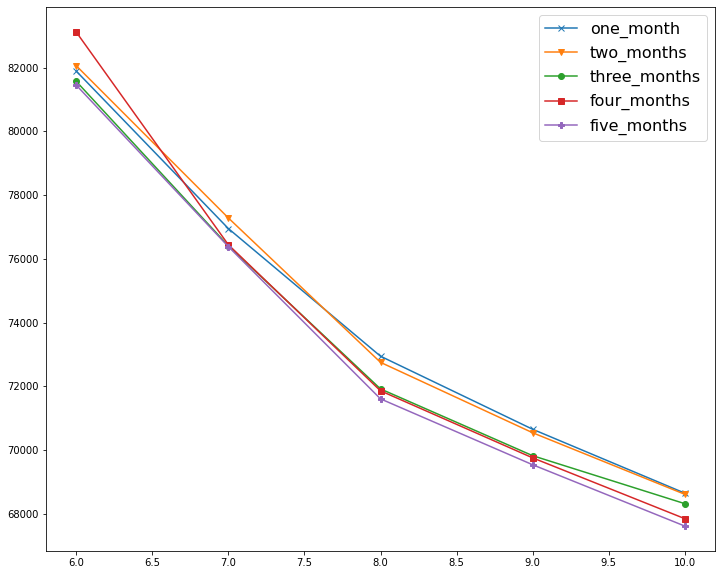

In [ ]:
markers=['x','v','o','s','P']
plt.figure(figsize=(12,10))
for (key,value),mark in zip(dict_cost.items(),markers):
  plt.plot(range(6,11),value[4:9],marker=mark,label=key)
  plt.legend(fontsize=16)

plt.show()

In [ ]:
def get_slope(values):

  slope1, intercept1 = np.polyfit(range(8,10),values[0:2],1)
  slope2, intercept2 = np.polyfit(range(9,11),values[-2:],1)
  m= np.round((np.abs(slope1)-np.abs(slope2))/np.abs(slope1),2)*100

  return m


In [ ]:
cost[5:8]

[69386.3607223333, 66063.95592867005, 63715.817578617345]

In [ ]:
get_slope(cost[5:8])

28.999999999999996

In [ ]:
dict_cost[1][6:9]

[72753.65909044471, 70543.38408905447, 68611.34864193168]

In [ ]:
get_slope(dict_cost[2][6:9])

28.000000000000004

The Idea is to see which data among the list_data have the same slope decrease ratio around **cluster 8** like the reference data

in our case the reference data has a decrese in the **slope ratio** of 28% between the 8 and the 9th cluster 

we have the same result with a data of three month old 

we set our maintenance contract to a period of **three month** 